In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
url = 'https://fredericksburg.craigslist.org/search/stafford-va/rva?lat=38.5107&lon=-77.4832&search_distance=350#search=1~gallery~0~0' 
raw = requests.get(url,headers=header) # Get page


models = ['cyclone', 'tiffin', 'thor', 'airstream', 'winnebago', 'jayco', 'keystone', 
          'coachmen', 'forest river', 'heartland', 'grand design', 'gulf stream', 'dutchmen', 
          'newmar', 'entegra', 'pleasure way', 'roadtrek', 'leisure travel vans', 'cherokee', 
          'zephyr', 'rockwood', 'jamboree', 'four winds', 'dynamax', 'chinook', 'born free']


bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [28]:
data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get furniture from the title string:
    words = title.split()
    hits = [word for word in words if word in models] # Find furniture in the title
    if len(hits) == 0:
        model = 'missing'
    else:
        model = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'model':model})
    


In [29]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('./src/craigslist_cville_rvs.csv') # Save data in case of a disaster
df.head()

(297, 6)


/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_24991/1462575105.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


,title,price,year,link,model,age
0,2014 school bus,3200,2014.0,https://albany.craigslist.org/rvs/d/cobleskill...,missing,11.0
1,2008 forest river cherokee park model,14200,2008.0,https://charlotte.craigslist.org/rvs/d/indian-...,cherokee,17.0
2,2019 hideout keystone 30' length,15900,2019.0,https://columbus.craigslist.org/rvd/d/circlevi...,keystone,6.0
3,2022 olympia highland 19' length,11900,2022.0,https://columbus.craigslist.org/rvd/d/circlevi...,missing,3.0
4,2022 fsx wildwood 178bhsk,12900,2022.0,https://columbus.craigslist.org/rvd/d/circlevi...,missing,3.0


count       297.000000
mean      32618.518519
std       31362.263995
min           0.000000
25%       12000.000000
50%       25942.000000
75%       42850.000000
max      199850.000000
Name: price, dtype: float64


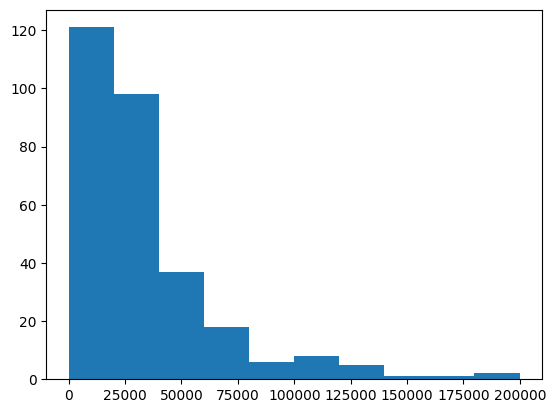

count    226.000000
mean       9.101770
std        8.396999
min        0.000000
25%        5.000000
50%        6.000000
75%       11.000000
max       55.000000
Name: age, dtype: float64


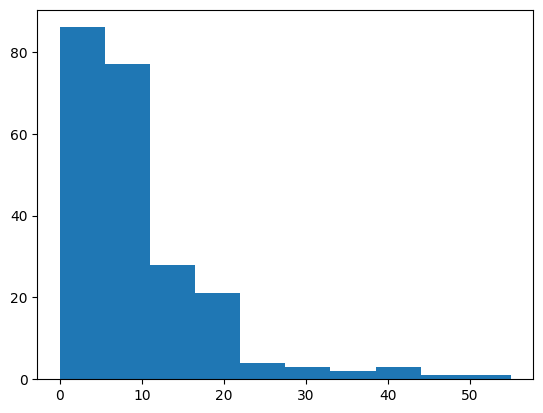

In [30]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [31]:
# Price by model type:
df.loc[:,['price','model']].groupby('model').describe()

price                                                              \
           count           mean           std       min        25%       50%   
model                                                                          
cherokee     3.0   13200.000000   1479.864859   11500.0   12700.00   13900.0   
coachmen     6.0   27165.000000  22618.362894    3495.0   12925.00   18550.0   
cyclone      1.0   34900.000000           NaN   34900.0   34900.00   34900.0   
dynamax      1.0   62500.000000           NaN   62500.0   62500.00   62500.0   
entegra      1.0  130000.000000           NaN  130000.0  130000.00  130000.0   
heartland    1.0    7500.000000           NaN    7500.0    7500.00    7500.0   
jamboree     1.0   17999.000000           NaN   17999.0   17999.00   17999.0   
jayco       12.0   40377.916667  51505.228969   13500.0   15673.75   25947.5   
keystone    14.0   19990.714286  11650.599334       0.0   14991.25   15450.0   
missing    194.0   28440.865979  29353.276889       0.0    9800.00   21997.5   
roadtrek     3.0  109630.000000  36663.328750   68900.0   94447.50  119995.0   
rockwood     6.0   18831.666667   7054.927829    9995.0   13500.00   19000.0   
thor        19.0   50533.157895  37111.402119   21000.0   38850.00   38880.0   
tiffin      17.0   43858.823529   4159.485969   42850.0   42850.00   42850.0   
winnebago   16.0   42021.875000  30278.540086       1.0   24250.00   34850.0   
zephyr       2.0   65159.000000     14.142136   65149.0   65154.00   65159.0   

                                
                 75%       max  
model                           
cherokee    14050.00   14200.0  
coachmen    46221.25   55900.0  
cyclone     34900.00   34900.0  
dynamax     62500.00   62500.0  
entegra    130000.00  130000.0  
heartland    7500.00    7500.0  
jamboree    17999.00   17999.0  
jayco       40675.00  199850.0  
keystone    29000.00   39000.0  
missing     32261.25  179000.0  
roadtrek   129995.00  139995.0  
rockwood    23746.25   28000.0  
thor        39850.00  184500.0  
tiffin      42850.00   60000.0  
winnebago   60225.00  106000.0  
zephyr      65164.00   65169.0

In [32]:
# Age by model:
df.loc[:,['age','model']].groupby('model').describe()

age                                                     
           count       mean        std   min    25%   50%   75%   max
model                                                                
cherokee     3.0  11.333333   4.932883   8.0   8.50   9.0  13.0  17.0
coachmen     6.0  10.666667   9.953224   3.0   5.25   7.0  11.0  30.0
cyclone      1.0   8.000000        NaN   8.0   8.00   8.0   8.0   8.0
dynamax      1.0  18.000000        NaN  18.0  18.00  18.0  18.0  18.0
entegra      1.0   3.000000        NaN   3.0   3.00   3.0   3.0   3.0
heartland    1.0  12.000000        NaN  12.0  12.00  12.0  12.0  12.0
jamboree     0.0        NaN        NaN   NaN    NaN   NaN   NaN   NaN
jayco        8.0   6.500000   3.338092   3.0   4.00   5.5   8.0  12.0
keystone    13.0   7.000000   4.618802   0.0   4.00   7.0  11.0  16.0
missing    137.0   9.781022   9.451669   0.0   4.00   6.0  12.0  55.0
roadtrek     2.0   5.000000   4.242641   2.0   3.50   5.0   6.5   8.0
rockwood     3.0   3.333333   1.527525   2.0   2.50   3.0   4.0   5.0
thor        19.0   7.105263   1.822536   5.0   6.00   6.0   8.0  11.0
tiffin      16.0   5.000000   0.000000   5.0   5.00   5.0   5.0   5.0
winnebago   13.0  12.615385  11.644301   3.0   5.00   9.0  17.0  46.0
zephyr       2.0  18.000000   0.000000  18.0  18.00  18.0  18.0  18.0

In [34]:
df.loc[ df['model']=='cyclone',:]

,title,price,year,link,model,age
251,sunset rv inc. #3459 2017 cyclone,34900,2017.0,https://myrtlebeach.craigslist.org/rvd/d/calab...,cyclone,8.0


<Axes: xlabel='age', ylabel='price'>

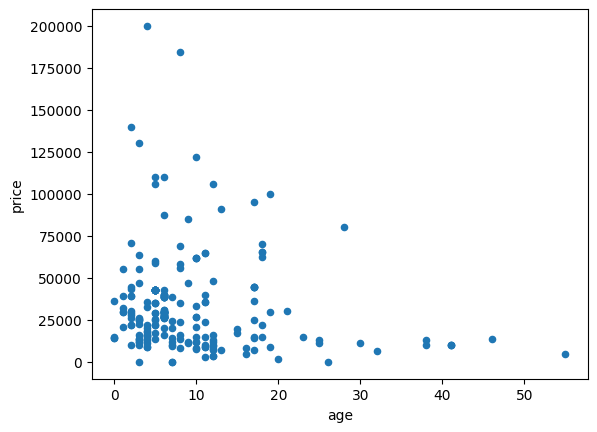

In [35]:
df.plot.scatter('age','price')

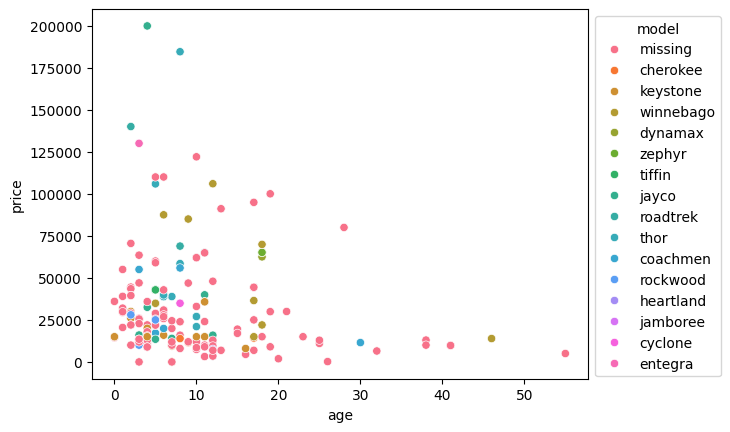

In [36]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='model')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/Users/chloe/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           log_price   log_age
log_price   3.017906 -0.141389
log_age    -0.141389  0.585594
           log_price   log_age
log_price   1.000000 -0.170097
log_age    -0.170097  1.000000


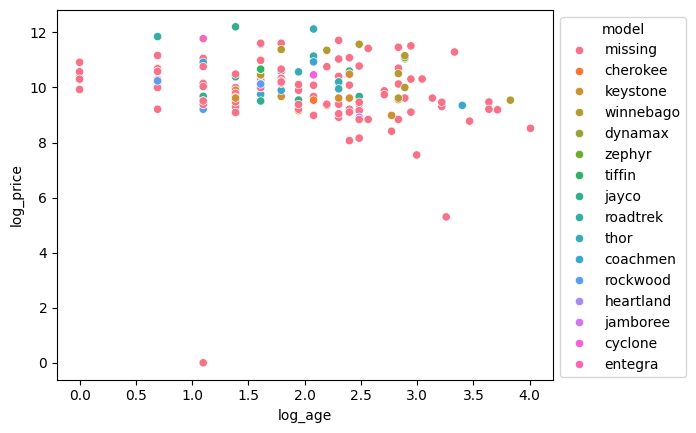

In [38]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='model')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

In [40]:
df.head()

,title,price,year,link,model,age,log_price,log_age
0,2014 school bus,3200,2014.0,https://albany.craigslist.org/rvs/d/cobleskill...,missing,11.0,8.070906,2.397895
1,2008 forest river cherokee park model,14200,2008.0,https://charlotte.craigslist.org/rvs/d/indian-...,cherokee,17.0,9.560997,2.833213
2,2019 hideout keystone 30' length,15900,2019.0,https://columbus.craigslist.org/rvd/d/circlevi...,keystone,6.0,9.674074,1.791759
3,2022 olympia highland 19' length,11900,2022.0,https://columbus.craigslist.org/rvd/d/circlevi...,missing,3.0,9.384294,1.098612
4,2022 fsx wildwood 178bhsk,12900,2022.0,https://columbus.craigslist.org/rvd/d/circlevi...,missing,3.0,9.464983,1.098612
